In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [117]:
data= pd.read_csv('D:\\Data Sets Practice\\USA_Housing.csv')

## Importing USA housing data Set

In [119]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Drawing the correlation between the parameters

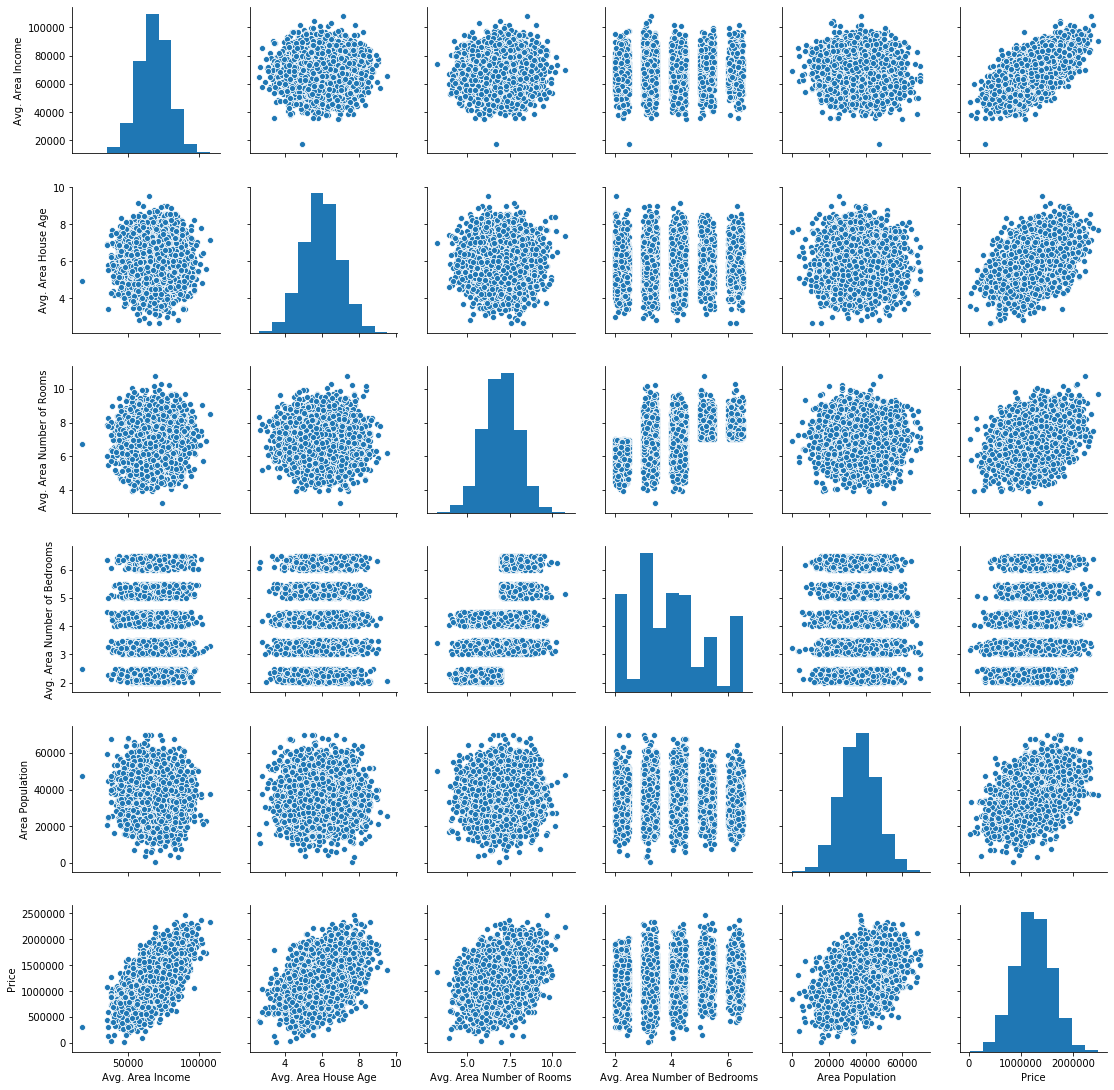

In [9]:
sns.pairplot(data)

In [19]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [120]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Taking all parameters for model1

In [23]:
train1= data.iloc[:3500,]
test1= data.iloc[3500:,]

train_x=train1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
train_y= train1['Price']

test_x=test1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
test_y= test1['Price']

In [27]:
lm1= LinearRegression()

In [28]:
lm1.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(lm1.coef_,lm1.intercept_)

[2.16785327e+01 1.65557313e+05 1.20430516e+05 1.06216590e+03
 1.51419972e+01] -2636197.7857519807


In [31]:
predict= lm1.predict(train_x)

In [32]:
future= lm1.predict(test_x)

In [34]:
rms1= mean_squared_error(predict, train_y)
r1= r2_score(predict, train_y)
print(rms1)
print(r1)

10237315631.464546
0.9107611949887231


In [35]:
rms2= mean_squared_error(future, test_y)
r2= r2_score(future, test_y)
print(rms2)
print(r2)

10193008802.614313
0.9107446172346346


Text(0, 0.5, 'Sales')

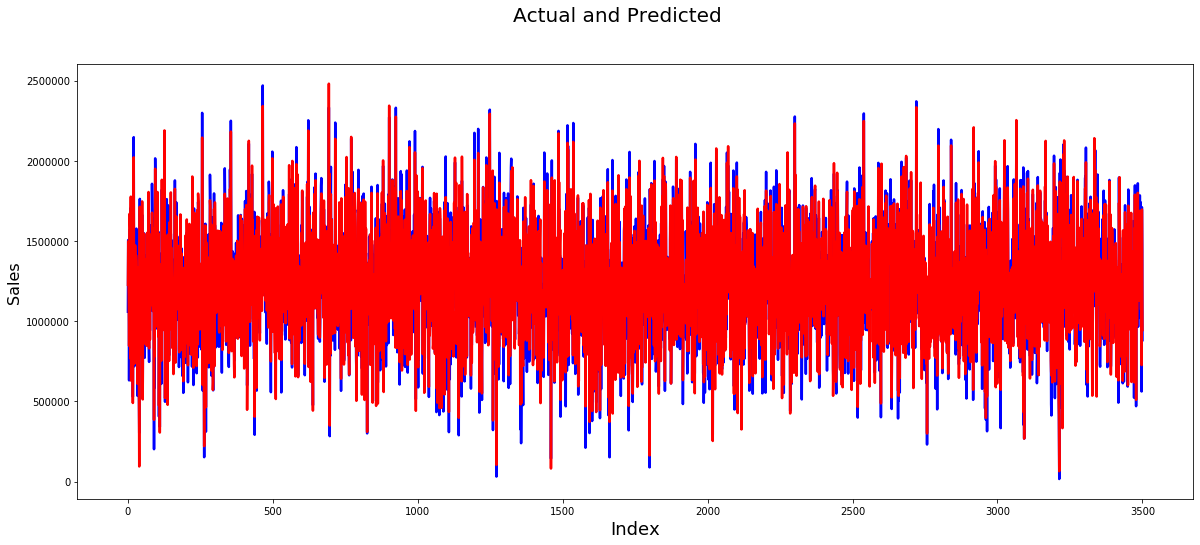

In [36]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,3501,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,train_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,predict, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'Sales')

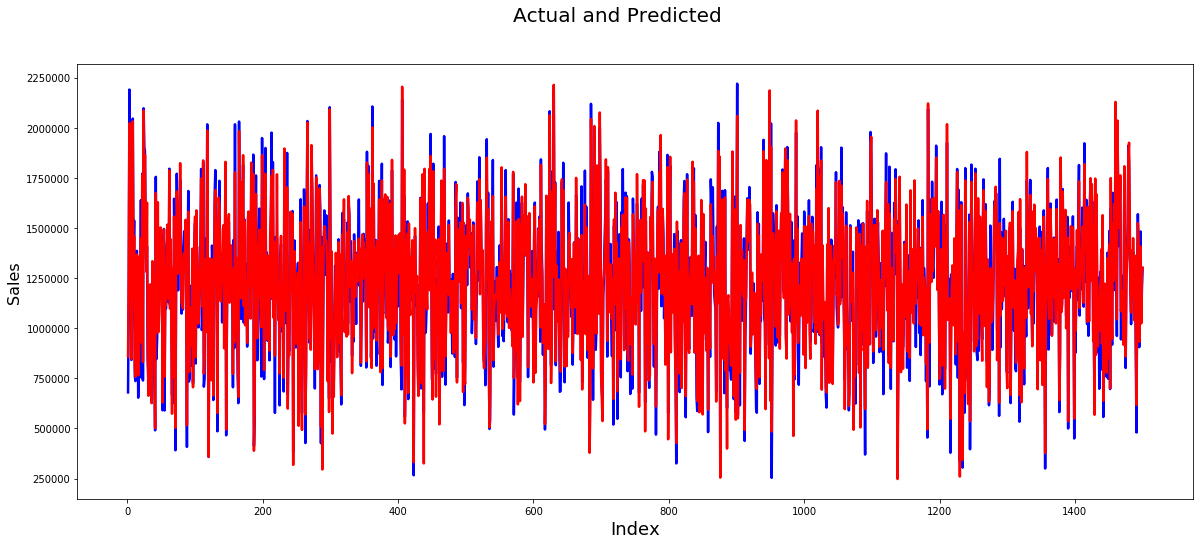

In [121]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,1501,1)]         # generating index 
fig = plt.figure(figsize=(20,8))
plt.plot(c,test_y, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,future, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

## Finidng the imp features as per the P value

In [43]:
import statsmodels.api as sm

In [45]:
X_train = train_x
X_train_sm= sm.add_constant(X_train)
slm= sm.OLS(train_y, X_train).fit()

In [122]:
print(slm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          1.907e+04
Date:                Thu, 23 Sep 2021   Prob (F-statistic):                        0.00
Time:                        01:21:38   Log-Likelihood:                         -48355.
No. Observations:                3500   AIC:                                  9.672e+04
Df Residuals:                    3495   BIC:                                  9.675e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

## Removing the Avg. Area Number of Bedrooms column as per the P value

In [65]:
train1= data.iloc[:3500,]
test1= data.iloc[3500:,]

train_x1=train1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
train_y1= train1['Price']

test_x1=test1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
test_y1= test1['Price']

In [71]:
data2=train1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population','Price']]

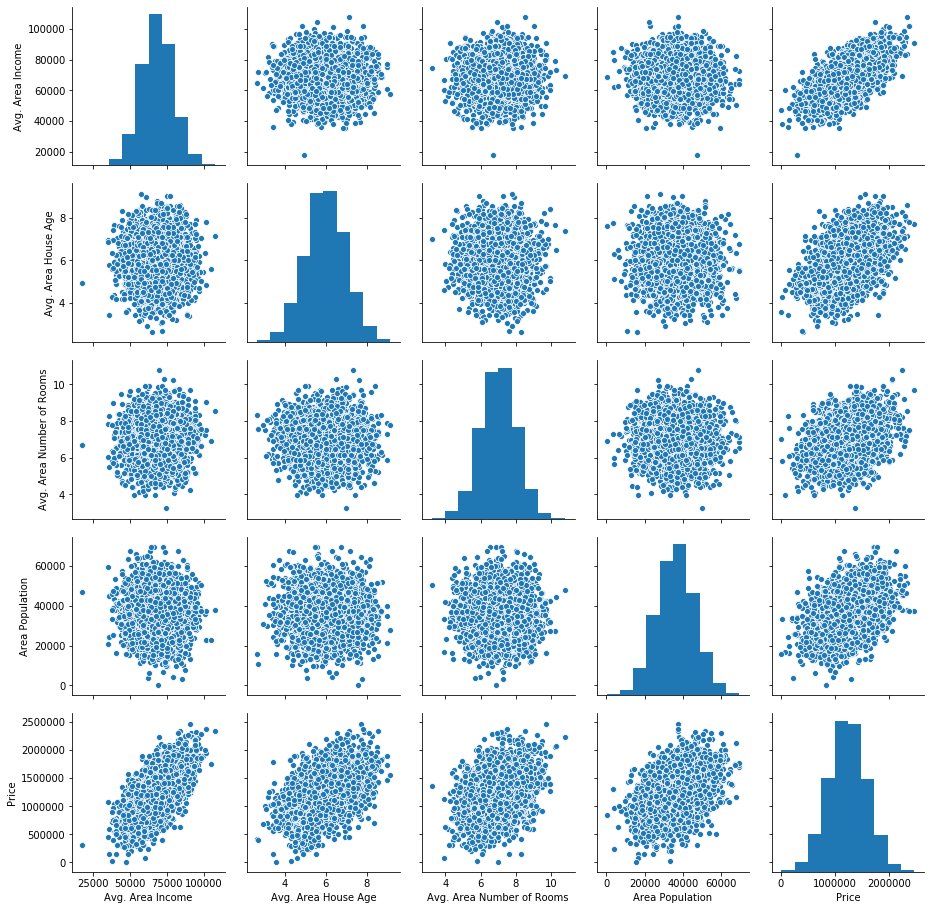

In [72]:
sns.pairplot(data2)

In [56]:
lm2= LinearRegression()
lm2.fit(train_x1,train_y1)
print(lm2.coef_,lm2.intercept_)

[2.16818898e+01 1.65597947e+05 1.21042519e+05 1.51387773e+01] -2636610.675475021


In [60]:
predict1= lm2.predict(train_x1)

In [61]:
future1= lm2.predict(test_x1)

In [63]:
rms3= mean_squared_error(predict1, train_y1)
r3= r2_score(predict1, train_y1)
print(rms3)
print(r3)

10238653942.626225
0.9107484876991851


In [64]:
rms4= mean_squared_error(future1, test_y1)
r4= r2_score(future1, test_y1)
print(rms4)
print(r4)

10199273430.816916
0.9107184167469169


In [49]:
X_train2= train_x1
X_sm2= sm.add_constant(X_train2)
slm2= sm.OLS(train_y,X_sm2).fit()
print(slm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     9790.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:25:01   Log-Likelihood:                -45303.
No. Observations:                3500   AIC:                         9.062e+04
Df Residuals:                    3495   BIC:                         9.065e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Removing the Outliers using IQR

In [73]:
#Finding the IQR value for the dataframe
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64


In [74]:
#Removing those data points lying out of the IQR range
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape #This hsows the shape of the dataframe after removing outliers

(4865, 7)

In [75]:
data_out.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


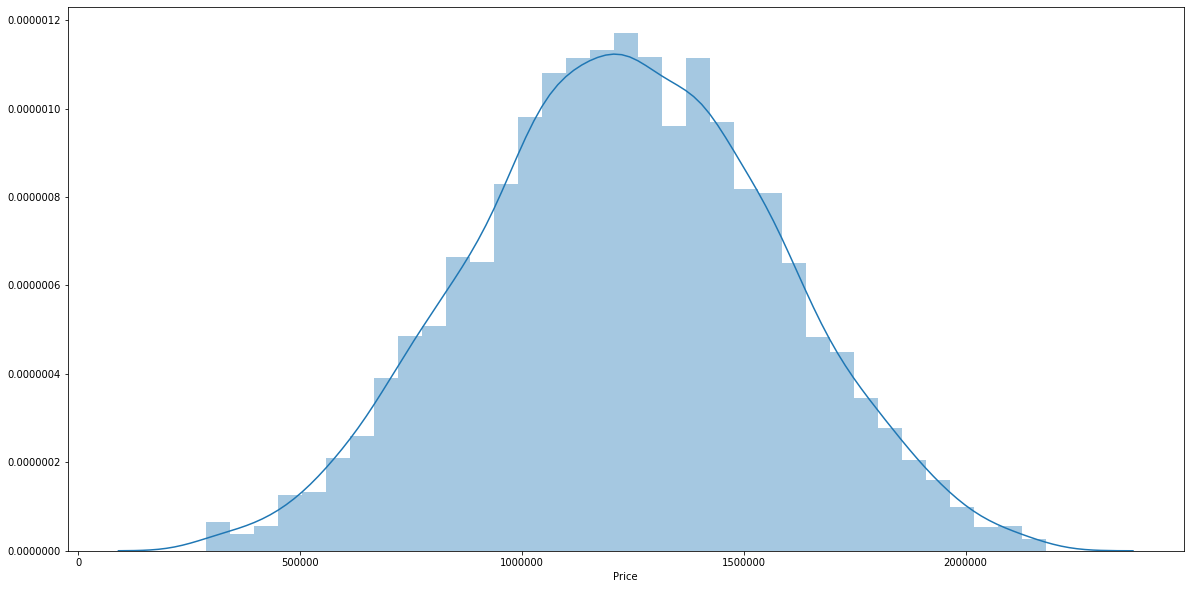

In [116]:
import matplotlib.pyplot as plt
#Plotiing histogram
plt.figure(figsize = (20,10))
# plt.hist(data_out['Price'])
# plt.show()
sns.distplot(data_out['Price'])

In [77]:
train1= data_out.iloc[:3406,]
test1= data_out.iloc[3406:,]

train_x1=train1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
train_y1= train1['Price']

test_x1=test1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
test_y1= test1['Price']

In [78]:
lm2= LinearRegression()
lm2.fit(train_x1,train_y1)
print(lm2.coef_,lm2.intercept_)

[2.16501797e+01 1.65436460e+05 1.20619041e+05 1.49737008e+01] -2624956.341059644


In [79]:
predict1= lm2.predict(train_x1)

In [80]:
future1= lm2.predict(test_x1)

In [81]:
rms3= mean_squared_error(predict1, train_y1)
r3= r2_score(predict1, train_y1)
print(rms3)
print(r3)

10188331950.87572
0.9014090226694108


In [82]:
rms4= mean_squared_error(future1, test_y1)
r4= r2_score(future1, test_y1)
print(rms4)
print(r4)

9998024376.968712
0.9079272001980032


In [84]:
X_train2= train_x1
X_sm2= sm.add_constant(X_train2)
slm2= sm.OLS(train_y1,X_sm2).fit()
print(slm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8624.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        00:36:57   Log-Likelihood:                -44078.
No. Observations:                3406   AIC:                         8.817e+04
Df Residuals:                    3401   BIC:                         8.820e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
data_out1= data_out[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
                     'Area Population','Price']]

In [118]:
data_out.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Normalising the dataset using MinMax Scaler

In [107]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
scaler = MinMaxScaler()
data_f = scaler.fit_transform(data_out1)

data_out1[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
                     'Area Population','Price']]= scaler.fit_transform(data_out1[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
                     'Area Population','Price']])

In [112]:
data_out1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.691651,0.441624,0.501148,0.464444,0.254300,0.407726
1,0.686441,0.502017,0.449841,0.242222,0.573813,0.643814
2,0.371164,0.476163,0.778271,0.695556,0.512273,0.407702
3,0.407291,0.725698,0.238969,0.280000,0.464178,0.514228
4,0.348260,0.320416,0.654166,0.495556,0.315398,0.181553


In [113]:
train1= data_out1.iloc[:3406,]
test1= data_out1.iloc[3406:,]

train_x1=train1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
train_y1= train1['Price']

test_x1=test1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
test_y1= test1['Price']

In [114]:
X_train2= train_x1
X_sm2= sm.add_constant(X_train2)
slm2= sm.OLS(train_y1,X_sm2).fit()
print(slm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     8624.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        01:08:03   Log-Likelihood:                 5151.1
No. Observations:                3406   AIC:                        -1.029e+04
Df Residuals:                    3401   BIC:                        -1.026e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 